# Punto 1 Monte Carlo simulations

In [ ]:
#Zona de importaciones
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (17.0, 4.0)

In [ ]:
#Simulo los lanzamientos
def lanzamiento():
    num = random.randint(1,100)
    if 1<=num<=51:
        return False;
    else:
        return True;


In [ ]:
def apuesta(x,dinero,monto_apuesta,montos):
    temp = dinero
    for i in range(x):
        if lanzamiento():
            temp = temp + monto_apuesta
        else:
            temp = temp - monto_apuesta
    montos.append(temp)
    return montos

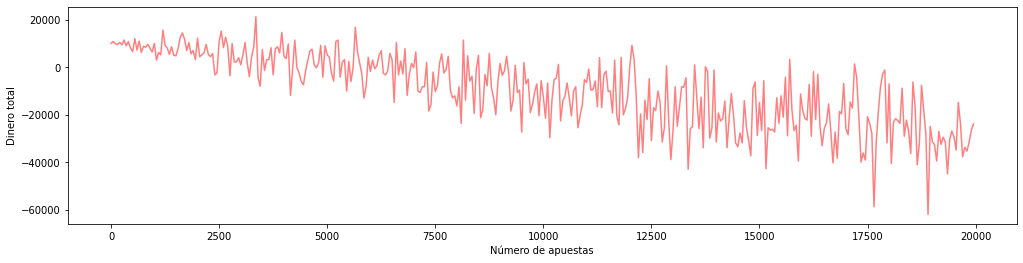

In [ ]:
num_simulaciones = 20000
rep = np.arange(0,20000,50)
montos = []

for i in range(0,20000,50):
   apuesta(i,10000,100,montos)


fig,ax = plt.subplots(1,1)
ax.set_xlabel("Número de apuestas")
ax.set_ylabel("Dinero total")
ax.plot(rep, montos, '-r', alpha = 0.5)


Podemos observar que cuando el jugador reliza más puestas, este tiende a perder. Por otro lado, si el jugador no realiza tantas apuestas, tiene más chance de ganar(quedarse) con algo de dinero.

# Punto 2 Markov Chain

In [ ]:
import numpy as np
import random as rm
#Extramos los estados
states = ["start","Thank","you","for","your","help","all","assistance","everything","end"]

#Sacamos aquellos estados con probabilidad de aparecer
transitionName = [["","ST","","","","","","","",""],
                  ["","","TY","","","","","","",""],
                  ["","","","YF","","","","","","YE"],
                  ["","","","","FY","","FA","","FE",""],
                  ["","","","","","YH","","YA","",""],
                  ["","","","","","","","","","HE"],
                  ["","","","","AY","","","","",""],
                  ["","","","","","","","","","AE"],
                  ["","","","","","","","","","EE"],
                  ["","","","","","","","","","EE"]]

#Probabilidad de los estados
transitionMatrix = [[0,1,0,0,0,0,0,0,0,0],
                    [0,0,1,0,0,0,0,0,0,0],
                    [0,0,0,0.8,0,0,0,0,0,0.2],
                    [0,0,0,0,0.5,0,0.25,0,0.25,0],
                    [0,0,0,0,0,0.66,0,0.34,0,0],
                    [0,0,0,0,0,0,0,0,0,1],
                    [0,0,0,0,1,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,1],
                    [0,0,0,0,0,0,0,0,0,1],
                    [0,0,0,0,0,0,0,0,0,1]]

#Verificamos que la matriz se encuentra bien definida   

suma = 0
for i in range(10):
  suma += sum(transitionMatrix[i])

if suma != 10:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")

All is gonna be okay, you should move on!! ;)


In [ ]:
def Frases():
  word = "start"
  print("Start state: " + word)
  wordList = [word]
  while word != "end":
    print("Tú malditamadre")
    if word == "start":
      change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
      if change == "ST":  
          word = "Thank"
          wordList.append("Thank")
          pass
    elif word == "Thank":
      change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
      if change == "TY":
          word = "you"
          wordList.append("you")
          pass
    elif word == "you":
      change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
      if change == "YF":
        word == "for"
        wordList.append("for")
        pass
      elif change == "YE":
        word == "end" 
        wordList.append("end")
    elif word == "for":
      change = np.random.choice(transitionName[3],replace=True,p=transitionMatrix[3])
      if change == "FY":
        word == "your"
        wordList.append("your")
        pass
      elif change == "FA":
        word == "all"
        wordList.append("all")
      elif change == "FE":
        word == "everything"
        wordList.append("everything")
    elif word == "your":
      change = np.random.choice(transitionName[4],replace=True,p=transitionMatrix[4])
      if change == "YH":
        word == "help"
        wordList.append("help")
        pass
      elif change == "YA":
        word == "assistance"
        wordList.append("assistance")
    elif word == "help":
      change = np.random.choice(transitionName[5],replace=True,p=transitionMatrix[5])
      if change == "HE":
        word == "end"
        wordList.append("end")
        pass
    elif word == "all":
      change = np.random.choice(transitionName[6],replace=True,p=transitionMatrix[6])
      if change == "AY":
        word == "your"
        wordList.append("your")
        pass
    elif word == "assistance":
      change = np.random.choice(transitionName[7],replace=True,p=transitionMatrix[7])
      if change == "AE":
        word == "end"
        wordList.append("end")
        pass
    elif word == "everything":
      change = np.random.choice(transitionName[8],replace=True,p=transitionMatrix[8])
      if change == "EE":
        word == "end"
        wordList.append("end")
        pass
    elif word == "end":
      change = np.random.choice(transitionName[9],replace=True,p=transitionMatrix[9])
      if change == "EE":
        word = "end"
        wordList.append("end")
        pass
    
  return wordList

  print("Possible states: " + str(wordList))
  #print("Probability of the possible sequence of states: " + str(prob))


Frases()

Start state: start


# Punto 3 MCMC

$f(x) = (\cfrac{x^{c-1}}{\gamma(c) \cdot b^c})^{\cfrac{-x}{b}}$

In [ ]:
#Zona de importaciones
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special as ss
from scipy.stats import gamma

In [ ]:
#Definimos la función
def gammaprop(x,b,c):
    return ((x**(c-1))/(ss.gamma(c)*(b**c)))**(-x/b)

In [ ]:
#Función para dar chance a el estado escogido
def random_coin(p):
    unif = random.uniform(0,1)
    if unif>=p:
        return False 
    else:
        return True

In [ ]:
#Calculamos la función por medio de MCMC, utilizamos dos estados (actual y siguiente), 
def gammaprop_mcmc(N,b,c):
    states = []
    cur = random.uniform(0,20)
    for i in range(0, N):
        states.append(cur)
        next = random.uniform(0,20)
        ap = min(gammaprop(next,b,c)/gammaprop(cur,b,c), 1)
        if random_coin(ap):
            cur = next
    return states[-1000:] 

In [ ]:
#Gráficamos la función generada por MCMC vs la original.
def plot_gprop(b,c):
    Ly = []
    Lx = []
    i_list = np.mgrid[0:20:100j]
    for i in i_list:
        Lx.append(i)
        Ly.append(gammaprop(i,b,c))
        
        
    plt.plot(Lx, Ly, 'r-',label="Real Distribution: b="+str(b)+", c="+str(c))
    plt.legend()
    plt.show()

    plt.hist(gammaprop_mcmc(1000,b,c), density=True,bins =25, histtype='step',label="Simulated_MCMC: b="+str(b)+", c="+str(c))
    plt.legend()
    plt.show()
  


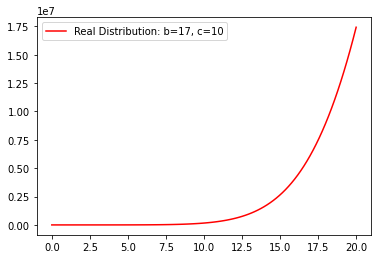

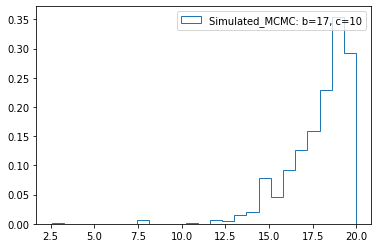

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


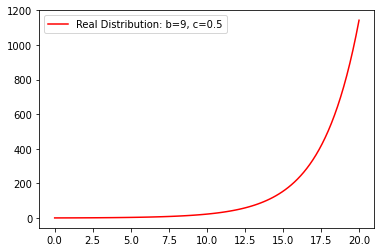

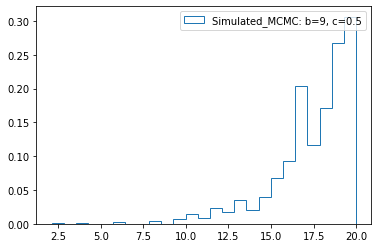

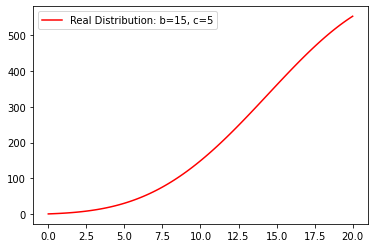

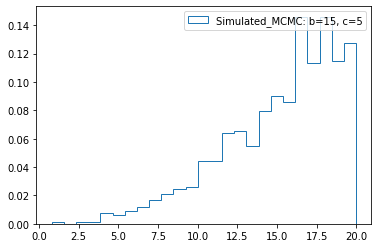

In [ ]:
plot_gprop(17,10)
plot_gprop(9,0.5)
plot_gprop(15,5)
